<h1><center>MNIST classification using Keras<center></h1>

# Importing Keras

In [22]:
# Importing the Keras main module forcing tensorflow 1.x backend
import tensorflow as tf
import keras
import numpy as np
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 1.15.0
Using keras version 2.2.5


## Loading and preparing the MNIST dataset

Load the MNIST dataset via keras.datasets. Again, turn train and test labels into one-hot encoding, and reshape and normalize data as in the first exercise. 

In [0]:
#@title
# The MNSIT dataset is ready to be imported from Keras into RAM
# Warning: you cannot do that for larger databases (e.g., ImageNet)
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [16]:
from keras.utils.np_utils import to_categorical
train_labels=to_categorical(y_train)
test_labels=to_categorical(y_test)

train_labels.shape

(60000, 10)

In [0]:
#  Reshape to proper images with 1 color channel according to backend scheme
img_rows, img_cols = x_train.shape[1], x_train.shape[2]

train_images = x_train.reshape((x_train.shape[0],img_rows*img_cols))
test_images = x_test.reshape((x_test.shape[0],img_rows*img_cols))

# Cast pixels from uint8 to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Now let us normalize the images so that they have zero mean and standard deviation
# Hint: are real testing data statistics known at training time ?

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_images)
train_images=scaler.transform(train_images)

scaler.fit(test_images)
test_images=scaler.transform(test_images)


## Defining the neural network architecture (i.e., the network model)

Look at this [cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras_Cheat_Sheet_Python.pdf) for some basic information on how to use numpy.

First, try to replicate the classifier of the first exercise. Secondly, create a fully connected network.
For the fully connected layer, you can for example use this architecture: 
$$ (784) \rightarrow (300) \rightarrow (10) $$
For this first implementation of the network, use only sigmoid activations in the hidden layer. Remember to use the right output activation function ! 

In [0]:
# The Sequential module is a container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

# START CODE HERE
input_shape = 784
output_shape = 10

model = Sequential()
model.add(Dense(300, input_dim=input_shape, activation='sigmoid'))
model.add(Dense(output_shape, activation='sigmoid'))

Instantiate a SGD optimizer with a tentative learning rate of $\\eta = 10^{-2}$ and, using the appropriate loss function (which is called, in keras, ```'categorical_crossentropy'```) and compile the model.

In [19]:
# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to the computed error gradints
from keras import optimizers


sgd = optimizers.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

# We can now have a look at the defined model topology
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


## Training the network

Train the model for 10 epochs using the ```.fit()``` method, validating the model at each epoch and keeping track of the training history for later plotting. Make sure you enable ```.fit()``` verbose mode in order to visualize the training.

In order to accelerate training, use the ```batch_size``` option of ```.fit()```, which will process a batch of examples at the same time, and make one update for all of them, averaged over the gradients for each training example of the batch. You can begin with a small size, and experiment with a larger size later.

In [20]:

# This is where the actual training-testing happens
# Number of epochs we want to train
epochs = 10

history=model.fit(train_images, train_labels, epochs=epochs, batch_size=10,verbose=2,validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 21s - loss: 0.5474 - acc: 0.8606 - val_loss: 0.3104 - val_acc: 0.9115
Epoch 2/10
 - 21s - loss: 0.2907 - acc: 0.9164 - val_loss: 0.2718 - val_acc: 0.9197
Epoch 3/10
 - 21s - loss: 0.2559 - acc: 0.9260 - val_loss: 0.2499 - val_acc: 0.9255
Epoch 4/10
 - 21s - loss: 0.2342 - acc: 0.9326 - val_loss: 0.2357 - val_acc: 0.9317
Epoch 5/10
 - 21s - loss: 0.2165 - acc: 0.9384 - val_loss: 0.2237 - val_acc: 0.9356
Epoch 6/10
 - 21s - loss: 0.2011 - acc: 0.9429 - val_loss: 0.2132 - val_acc: 0.9391
Epoch 7/10
 - 21s - loss: 0.1875 - acc: 0.9471 - val_loss: 0.2037 - val_acc: 0.9417
Epoch 8/10
 - 21s - loss: 0.1751 - acc: 0.9509 - val_loss: 0.1950 - val_acc: 0.9448
Epoch 9/10
 - 21s - loss: 0.1635 - acc: 0.9543 - val_loss: 0.1894 - val_acc: 0.9453
Epoch 10/10
 - 21s - loss: 0.1533 - acc: 0.9568 - val_loss: 0.1796 - val_acc: 0.9486


## Visualizing the network performance

Visualize the training history using the ```pyplot``` package:
- In one graph, plot the train and vaidation loss functions,
- In another graph, the train and validation accuracy.
By comparing the training the testing curves, what can we conclude about the quality of the training ?

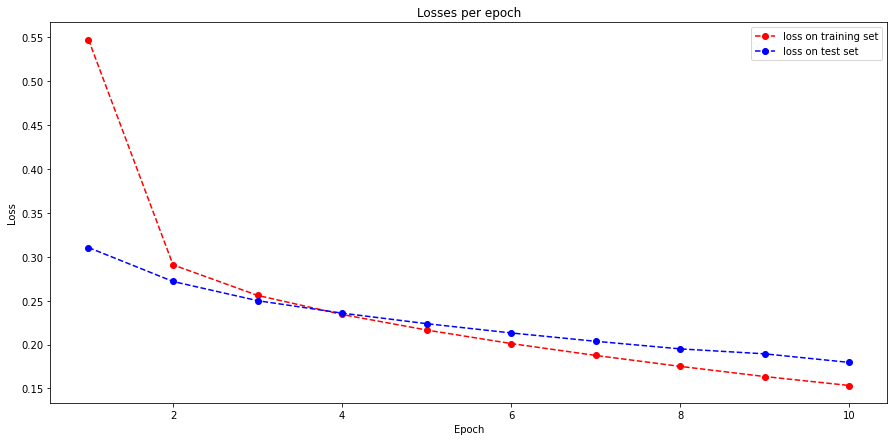

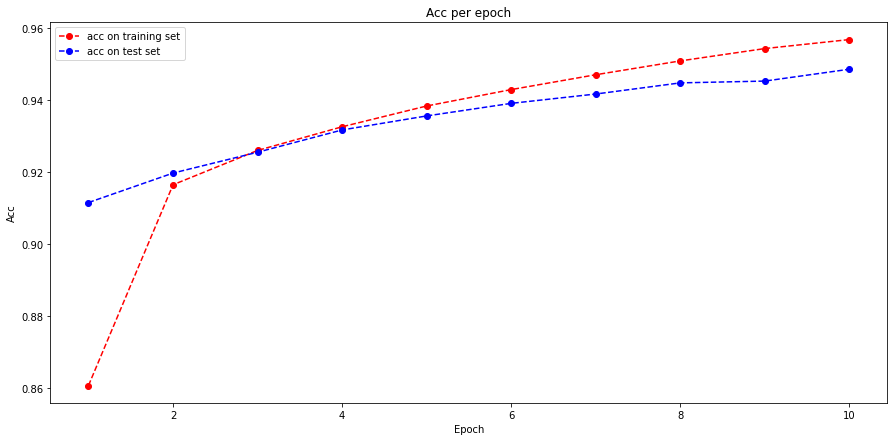

In [24]:
# We now want to plot the train and validation loss functions and accuracy curves
import matplotlib.pyplot as plt
epochs=np.arange(1,11)

#Losses
losses=history.history['loss']
val_losses=history.history['val_loss']
#Plot
plt.figure(figsize=(15,7))
plt.plot(epochs,losses,marker='o',linestyle='--',color='r',label='loss on training set')
plt.plot(epochs,val_losses,marker='o',linestyle='--',color='b',label='loss on test set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Losses per epoch')
plt.legend()
plt.show()

#Accuracies
accuracies=history.history['acc']
val_accuracies=history.history['val_acc']
#Plot
plt.figure(figsize=(15,7))
plt.plot(epochs,accuracies,marker='o',linestyle='--',color='r',label='acc on training set')
plt.plot(epochs,val_accuracies,marker='o',linestyle='--',color='b',label='acc on test set')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Acc per epoch')
plt.legend()
plt.show()

## Experiments

Note down the performance of the larger network in terms of training and validation accuracy as a reference (save the loss/accuracy graphs of the network).

Then, experiment as follow and compare performance with the reference scenario:

*  Experiment increasing the size of the batch and compare the performance with reference.
*  Experiment replacing the sigmoid activations with Relus and note what happens.
*  Experiment with a larger architecture, for example: 
$$ (784) \rightarrow (300) \rightarrow (128) \rightarrow (84) \rightarrow (10) $$


##Increasing the size of the batch

In [25]:
#Increasing the size of the batch 

model = Sequential()
model.add(Dense(300, input_dim=input_shape, activation='sigmoid'))
model.add(Dense(output_shape, activation='sigmoid'))
sgd = optimizers.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
history2=model.fit(train_images, train_labels, epochs=10, batch_size=30,verbose=2,validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.9132 - acc: 0.7740 - val_loss: 0.4477 - val_acc: 0.8884
Epoch 2/10
 - 7s - loss: 0.3950 - acc: 0.8942 - val_loss: 0.3439 - val_acc: 0.9046
Epoch 3/10
 - 7s - loss: 0.3304 - acc: 0.9071 - val_loss: 0.3074 - val_acc: 0.9117
Epoch 4/10
 - 7s - loss: 0.3003 - acc: 0.9148 - val_loss: 0.2881 - val_acc: 0.9152
Epoch 5/10
 - 7s - loss: 0.2814 - acc: 0.9193 - val_loss: 0.2756 - val_acc: 0.9178
Epoch 6/10
 - 7s - loss: 0.2676 - acc: 0.9231 - val_loss: 0.2647 - val_acc: 0.9227
Epoch 7/10
 - 7s - loss: 0.2567 - acc: 0.9267 - val_loss: 0.2585 - val_acc: 0.9225
Epoch 8/10
 - 7s - loss: 0.2474 - acc: 0.9291 - val_loss: 0.2507 - val_acc: 0.9261
Epoch 9/10
 - 7s - loss: 0.2395 - acc: 0.9310 - val_loss: 0.2460 - val_acc: 0.9282
Epoch 10/10
 - 7s - loss: 0.2322 - acc: 0.9337 - val_loss: 0.2402 - val_acc: 0.9304


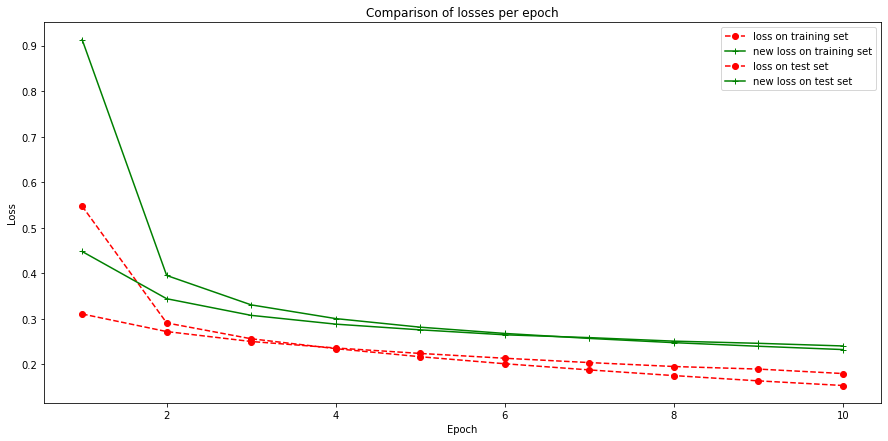

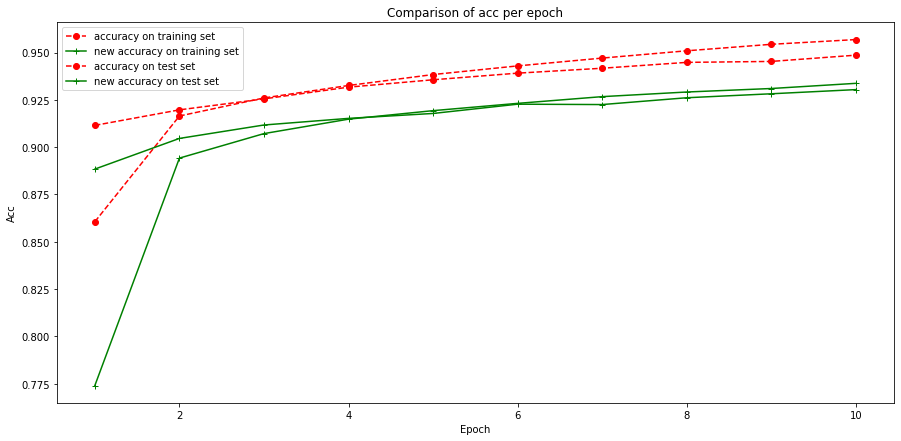

In [26]:
# We now want to plot the train and validation loss functions and accuracy curves

epochs=np.arange(1,11)

#New losses
losses2=history2.history['loss']
val_losses2=history2.history['val_loss']

#New accuracies 
accuracies2=history2.history['acc']
val_accuracies2=history2.history['val_acc']

#Plot
plt.figure(figsize=(15,7))
plt.plot(epochs,losses,marker='o',linestyle='--',color='r',label='loss on training set')
plt.plot(epochs,losses2,marker='+',color='g',label='new loss on training set')
plt.plot(epochs,val_losses,marker='o',linestyle='--',color='r',label='loss on test set')
plt.plot(epochs,val_losses2,marker='+',color='g',label='new loss on test set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparison of losses per epoch')
plt.legend()
plt.show()

plt.figure(figsize=(15,7))
plt.plot(epochs,accuracies,marker='o',linestyle='--',color='r',label='accuracy on training set')
plt.plot(epochs,accuracies2,marker='+',color='g',label='new accuracy on training set')
plt.plot(epochs,val_accuracies,marker='o',linestyle='--',color='r',label='accuracy on test set')
plt.plot(epochs,val_accuracies2,marker='+',color='g',label='new accuracy on test set')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Comparison of acc per epoch')
plt.legend()
plt.show()

Viewing the scores, we can see that it's better to take a little batch. In fact, with size_batch=30, we average over more data, and consequently, our model is less precise.

## Sigmoid --> Relu¶


In [27]:
#Sigmoid-->RELU
model = Sequential()
model.add(Dense(300, input_dim=input_shape, activation='relu'))
model.add(Dense(output_shape, activation='relu'))
sgd = optimizers.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
history3=model.fit(train_images, train_labels, epochs=10, batch_size=10,verbose=2,validation_data=(test_images,test_labels))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 22s - loss: 1.1922 - acc: 0.5505 - val_loss: 0.8200 - val_acc: 0.6901
Epoch 2/10
 - 22s - loss: 0.8021 - acc: 0.7453 - val_loss: 0.7430 - val_acc: 0.7715
Epoch 3/10
 - 22s - loss: 0.8134 - acc: 0.7226 - val_loss: 0.7226 - val_acc: 0.7952
Epoch 4/10
 - 21s - loss: 1.1726 - acc: 0.6332 - val_loss: 2.0952 - val_acc: 0.1065
Epoch 5/10
 - 21s - loss: 1.8571 - acc: 0.1554 - val_loss: 1.6590 - val_acc: 0.2132
Epoch 6/10
 - 22s - loss: 1.5168 - acc: 0.2759 - val_loss: 1.3718 - val_acc: 0.3506
Epoch 7/10
 - 21s - loss: 1.2705 - acc: 0.4162 - val_loss: 1.1438 - val_acc: 0.4981
Epoch 8/10
 - 21s - loss: 1.0614 - acc: 0.5405 - val_loss: 1.0900 - val_acc: 0.5160
Epoch 9/10
 - 22s - loss: 1.0287 - acc: 0.5600 - val_loss: 0.9526 - val_acc: 0.6427
Epoch 10/10
 - 21s - loss: 0.8279 - acc: 0.7290 - val_loss: 0.7217 - val_acc: 0.7955


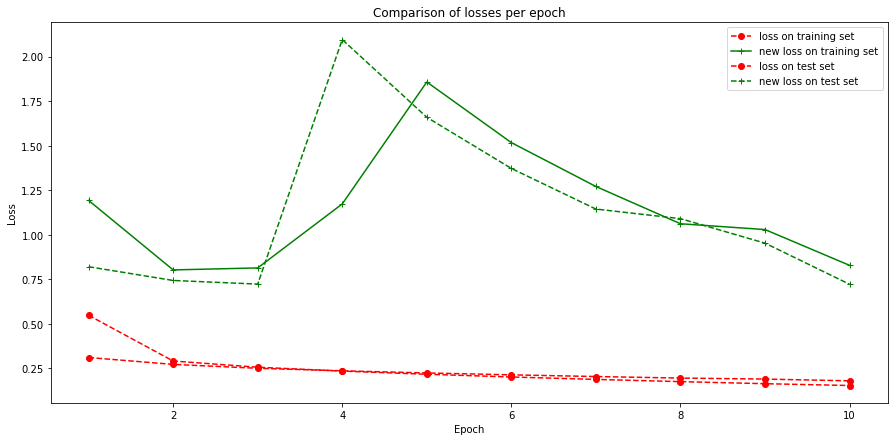

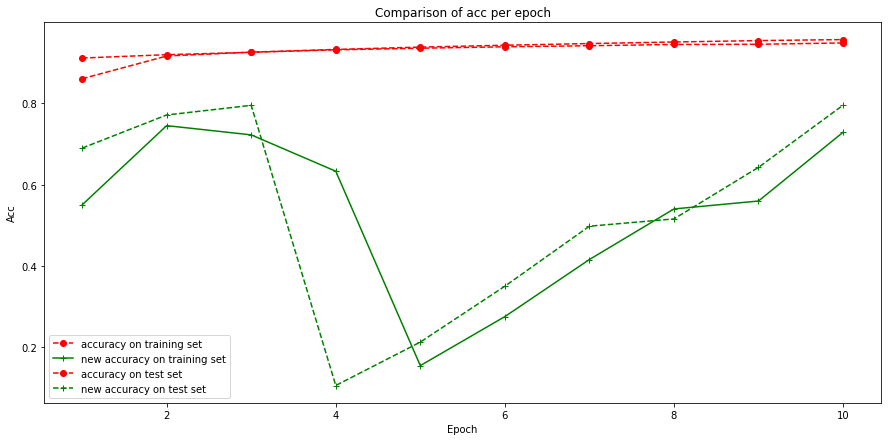

In [28]:
# We now want to plot the train and validation loss functions and accuracy curves

epochs=np.arange(1,11)

#New losses
losses3=history3.history['loss']
val_losses3=history3.history['val_loss']

#New accuracies 
accuracies3=history3.history['acc']
val_accuracies3=history3.history['val_acc']

#Plot
plt.figure(figsize=(15,7))
plt.plot(epochs,losses,marker='o',linestyle='--',color='r',label='loss on training set')
plt.plot(epochs,losses3,marker='+',color='g',label='new loss on training set')
plt.plot(epochs,val_losses,marker='o',linestyle='--',color='r',label='loss on test set')
plt.plot(epochs,val_losses3,marker='+',linestyle='--',color='g',label='new loss on test set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparison of losses per epoch')
plt.legend()
plt.show()

plt.figure(figsize=(15,7))
plt.plot(epochs,accuracies,marker='o',linestyle='--',color='r',label='accuracy on training set')
plt.plot(epochs,accuracies3,marker='+',color='g',label='new accuracy on training set')
plt.plot(epochs,val_accuracies,marker='o',linestyle='--',color='r',label='accuracy on test set')
plt.plot(epochs,val_accuracies3,marker='+',linestyle='--',color='g',label='new accuracy on test set')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Comparison of acc per epoch')
plt.legend()
plt.show()


With relu instead of sigmoid, the model is less efficient for this dataset. It's also more fluctuant, and doesn't have a tendency. Maybe the epoch number is too small ?

## A larger architecture

In [29]:
#A larger architecture 
model = Sequential()
model.add(Dense(300, input_dim=input_shape, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(84, activation='sigmoid'))
model.add(Dense(output_shape, activation='sigmoid'))
sgd = optimizers.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
history4=model.fit(train_images, train_labels, epochs=10, batch_size=10,verbose=2,validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 26s - loss: 2.1053 - acc: 0.3327 - val_loss: 1.4163 - val_acc: 0.6717
Epoch 2/10
 - 24s - loss: 0.8205 - acc: 0.7843 - val_loss: 0.5239 - val_acc: 0.8567
Epoch 3/10
 - 25s - loss: 0.4456 - acc: 0.8768 - val_loss: 0.3803 - val_acc: 0.8926
Epoch 4/10
 - 25s - loss: 0.3502 - acc: 0.9002 - val_loss: 0.3212 - val_acc: 0.9084
Epoch 5/10
 - 25s - loss: 0.3007 - acc: 0.9131 - val_loss: 0.2864 - val_acc: 0.9164
Epoch 6/10
 - 25s - loss: 0.2680 - acc: 0.9229 - val_loss: 0.2594 - val_acc: 0.9236
Epoch 7/10
 - 25s - loss: 0.2430 - acc: 0.9296 - val_loss: 0.2408 - val_acc: 0.9283
Epoch 8/10
 - 25s - loss: 0.2225 - acc: 0.9356 - val_loss: 0.2242 - val_acc: 0.9343
Epoch 9/10
 - 25s - loss: 0.2049 - acc: 0.9412 - val_loss: 0.2116 - val_acc: 0.9383
Epoch 10/10
 - 25s - loss: 0.1897 - acc: 0.9452 - val_loss: 0.2014 - val_acc: 0.9410


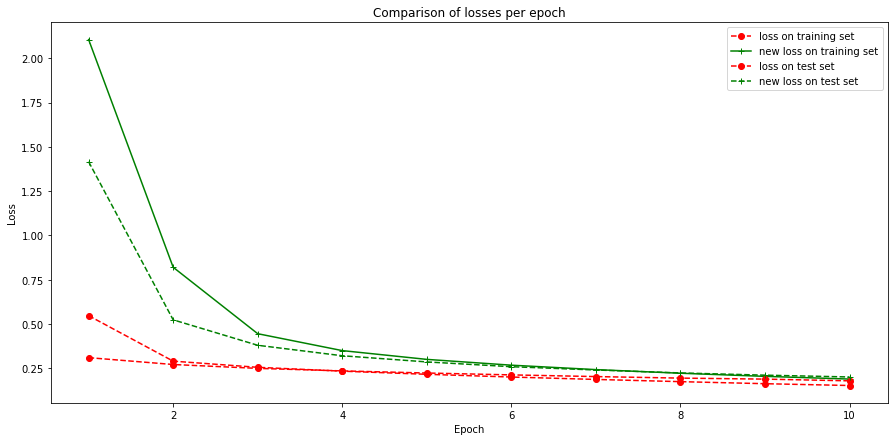

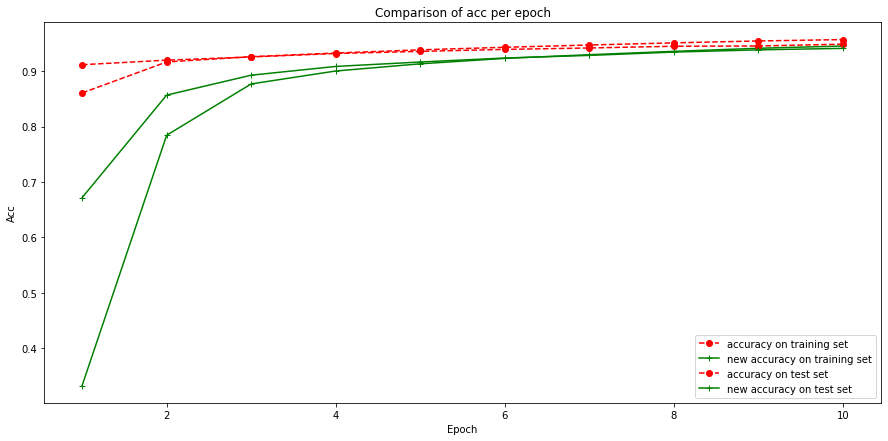

In [30]:
# We now want to plot the train and validation loss functions and accuracy curves

epochs=np.arange(1,11)

#New losses
losses4=history4.history['loss']
val_losses4=history4.history['val_loss']

#New accuracies 
accuracies4=history4.history['acc']
val_accuracies4=history4.history['val_acc']

#Plot
plt.figure(figsize=(15,7))
plt.plot(epochs,losses,marker='o',linestyle='--',color='r',label='loss on training set')
plt.plot(epochs,losses4,marker='+',color='g',label='new loss on training set')
plt.plot(epochs,val_losses,marker='o',linestyle='--',color='r',label='loss on test set')
plt.plot(epochs,val_losses4,marker='+',linestyle='--',color='g',label='new loss on test set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparison of losses per epoch')
plt.legend()
plt.show()

plt.figure(figsize=(15,7))
plt.plot(epochs,accuracies,marker='o',linestyle='--',color='r',label='accuracy on training set')
plt.plot(epochs,accuracies4,marker='+',color='g',label='new accuracy on training set')
plt.plot(epochs,val_accuracies,marker='o',linestyle='--',color='r',label='accuracy on test set')
plt.plot(epochs,val_accuracies4,marker='+',color='g',label='new accuracy on test set')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Comparison of acc per epoch')
plt.legend()
plt.show()


This show that having a more complex model is not necessary for this dataset !